In [63]:
import numpy as np
import pandas as pd
import phik 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_excel('11-Chapter-11/data/default of credit card clients.xls', skiprows = 1, index_col = 0)

In [18]:
# Scan through the data
df.head(3).T

ID,1,2,3
limit_bal,20000,120000,90000
sex,2,2,2
education,2,2,2
marriage,1,2,2
age,24,26,34
pay_0,2,-1,0
pay_2,2,2,0
pay_3,-1,0,0
pay_4,-1,0,0
pay_5,-2,0,0


In [14]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [16]:
# check for null values
df.isnull().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [20]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.0,129748.0,10000.0,50000.0,140000.0,240000.0,1000000.0
sex,30000.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0
education,30000.0,2.0,1.0,0.0,1.0,2.0,2.0,6.0
marriage,30000.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0
age,30000.0,35.0,9.0,21.0,28.0,34.0,41.0,79.0
pay_0,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
pay_2,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
pay_3,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
pay_4,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
pay_5,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0


In [21]:
# get the numeric features
from pandas.api.types import is_numeric_dtype

numeric_features = []
categorical_features = []

for col in df.columns:
    if is_numeric_dtype(df[col]):
        numeric_features.append(col)
    else:
        categorical_features.append(col)

In [27]:
score = []
pvalue= []
feature=[]
y = df[df.columns[-1]]
for col in df.columns[:-1]:
    if(is_numeric_dtype(df[col])):
        score.append(phik.phik_from_array(df[col], y, bins = [col]))
        pvalue.append(phik.significance.significance_from_array(df[col], y, bins = [col])[0])

In [43]:
results = pd.DataFrame()
results.index = df.columns[:-1]
results['Pvalue'] = pvalue
results['Score'] = score

array([<AxesSubplot:title={'center':'Pvalue'}>,
       <AxesSubplot:title={'center':'Score'}>], dtype=object)

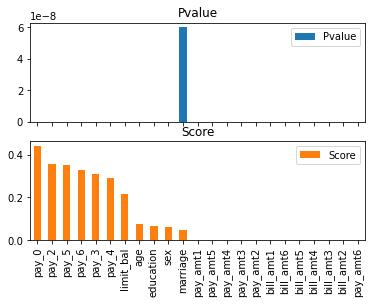

In [44]:
results.sort_values('Score',ascending=False).plot.bar(subplots = True)

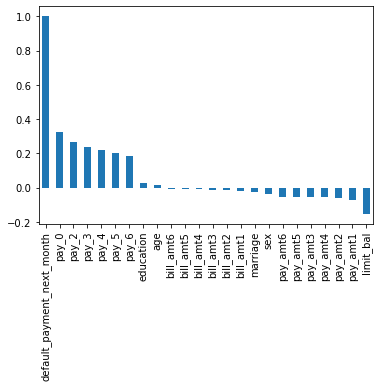

In [52]:
df.corr().loc[df.columns[-1]].sort_values(ascending = False).plot.bar()
plt.show()

In [53]:
train_features = df.drop('default_payment_next_month', axis = 1)
train_targets  = df['default_payment_next_month']

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [57]:
lr.fit(train_features, train_targets)

LogisticRegression()

In [58]:
lr.score(train_features, train_targets)

0.7788333333333334

In [61]:
print(f"{train_targets.value_counts()[0]/len(train_targets)}")

0.7788


<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

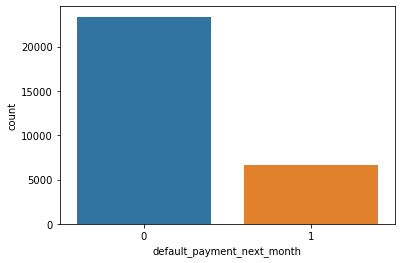

In [64]:
sns.countplot(train_targets)

In [65]:
# Since the class is imabalanced the resultant accuracy prediction is also biased

<AxesSubplot:>

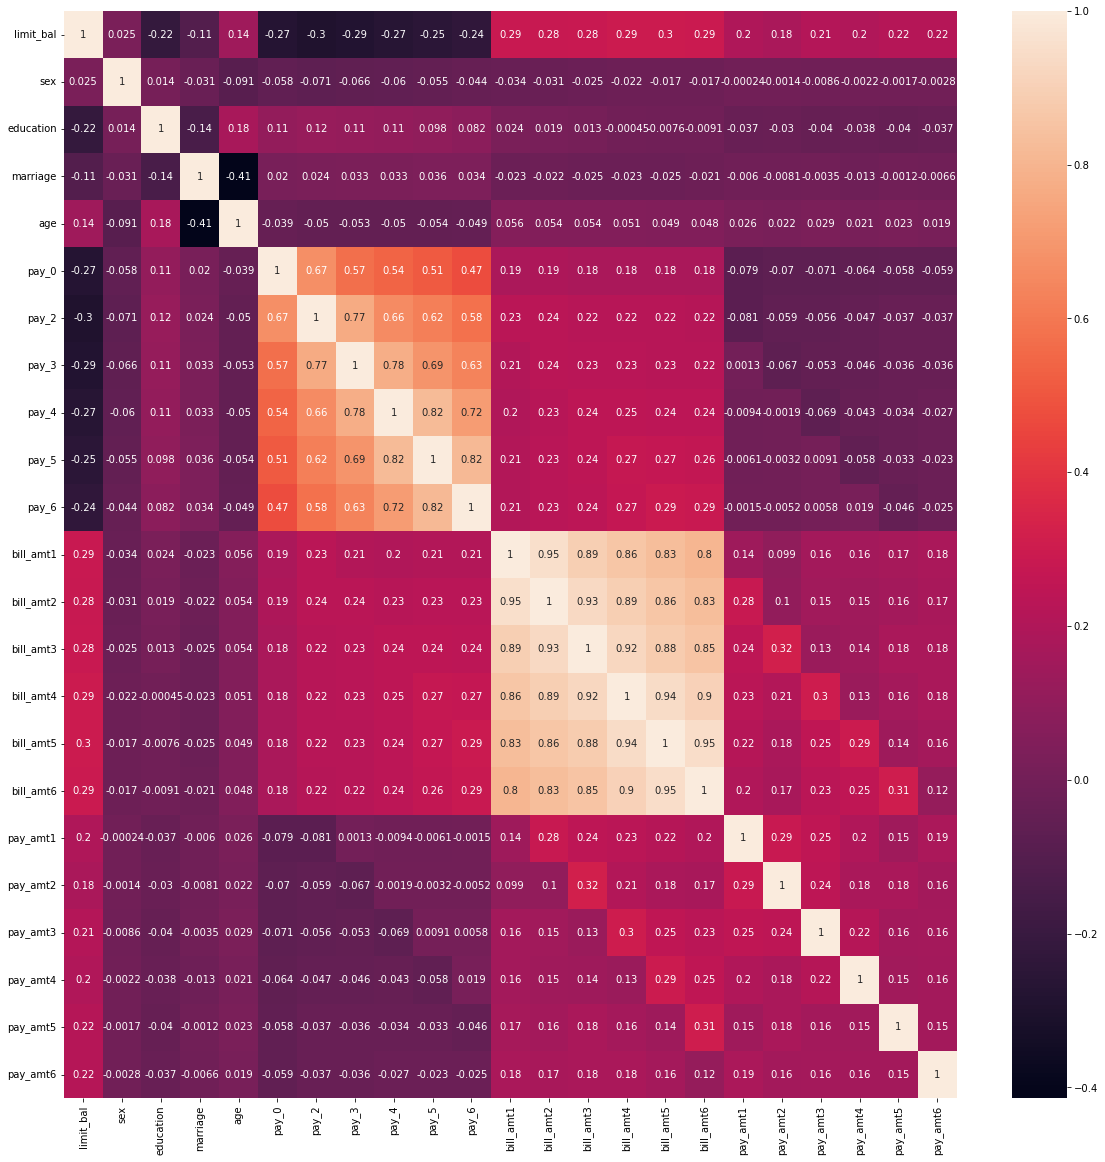

In [67]:
# getting predictions for our model
plt.figure(figsize = (20, 20))
sns.heatmap(train_features.corr(), annot = True)

In [69]:
predictions = lr.predict(train_features)

In [81]:
(lr.predict_proba(train_features)[:,1] >= 0.5).astype('int32') == predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
lr.coef_[0]

array([-5.06147552e-06, -3.89613825e-05, -4.81715816e-05, -4.07843509e-05,
       -6.90845843e-04,  5.06286852e-05,  3.93025432e-05,  3.46876744e-05,
        3.26896040e-05,  3.07206888e-05,  2.87450163e-05, -7.79486208e-06,
       -1.26501165e-07,  2.43620478e-06,  3.71432864e-06,  2.42402230e-06,
        3.85843387e-06, -3.79930583e-05, -2.65798578e-05, -1.43767047e-05,
       -1.07656106e-05, -1.02235035e-05,  3.98538844e-07])

In [83]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [87]:
scaler = StandardScaler()

In [89]:
scaled_features = scaler.fit_transform(train_features)

In [90]:
scaled_lr = LogisticRegression(random_state = 42)

In [91]:
scaled_lr.fit(scaled_features, train_targets)

LogisticRegression(random_state=42)

In [98]:
coef = np.exp(scaled_lr.coef_[0])-1

In [105]:
idx = abs(coef).argsort()[::-1]

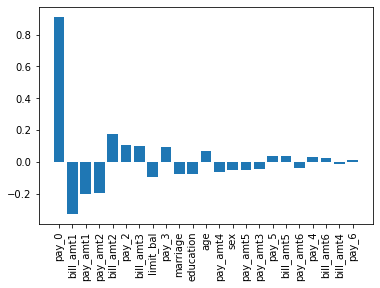

In [109]:
plt.bar(range(len(idx)), coef[idx])
plt.xticks(range(len(idx)), train_features.columns[idx], rotation = 90)
plt.show()